# Introduction
EDA(Exploratory Data Analysis) on Wine Quality Dataset. 
Author - Priyank Kaushik

## Importing Libraries
Some of the basic libraries used for the EDA

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Importing the Dataset


In [8]:
record = pd.read_csv('C:/Users/Home/Desktop/EDA Wine Quality/dataset.csv')

### Viewing Dataset

In [13]:
record.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


head() is used to view first 5 rows of the data.

### Data Insights

In [12]:
record.shape

(1599, 12)

In [11]:
record.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [10]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Data has only float and integer values.
No variable column has null/missing values.

## Understanding Dependent Variable - Quality

In [9]:
record.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Dependent variable is discrete and categorical in nature."quality" score scale ranges from 1 to 10, where 1 being poor and 10 being the best. 1,2,9 & 10 Quality ratings are not given by any obseravtion.Only scores obtained are between 3 to 8.

In [15]:
record.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

This tells us vote count of each quality score in descending order."quality" has most values concentrated in the categories 5, 6 and 7.Only a few observations made for the categories 3 & 8.

## Data Visualisation

### To check missing values

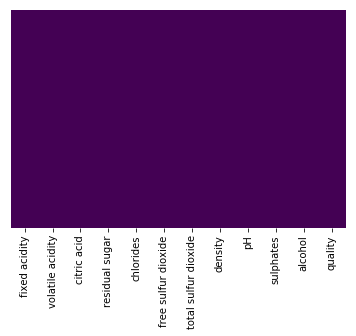

In [18]:
sns.heatmap(record.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Dataset has no missing values. If there were any, you would've noticed in figure represented by different colour shade on purple background.

### To check correlation

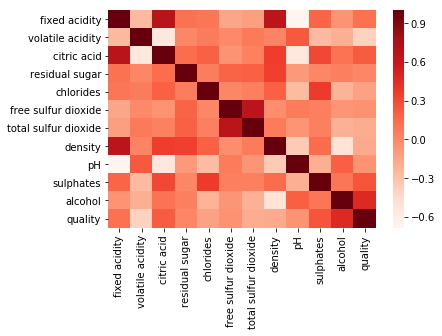

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(record.corr(),cmap='Reds',annot=False)

Dark shades represents positive correlation while lighter shades represents negative correlation. If you set annot=True, you'll get values by which features are correlated to each other in grid-cells.

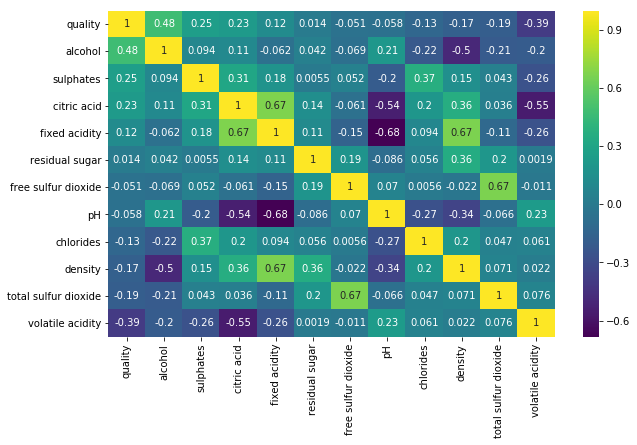

In [21]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = record.corr().nlargest(k, 'quality')['quality'].index
cm = record[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Here we can infer that "density" has strong positive correlation with "fixed acidity" whereas it has strong negative correlation with "alcohol".

### To check distribution-Skewness

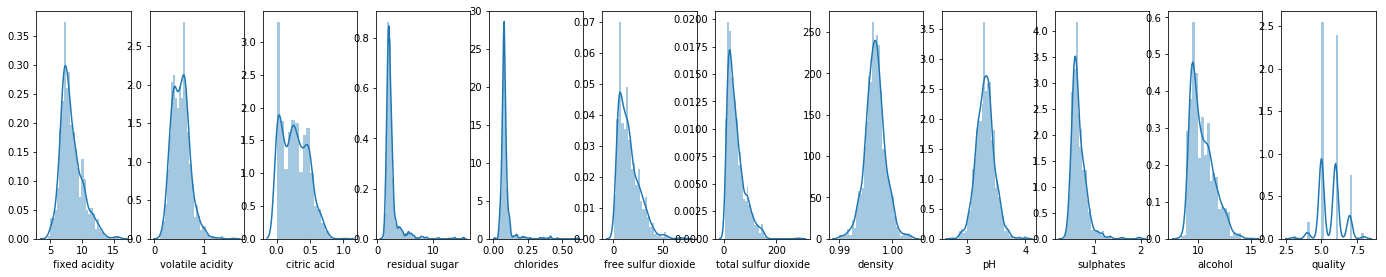

In [23]:
l = record.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(record[l[i]],kde=True)

"pH" column appears to be normally distributed, remaining all independent variables are right skewed/positively skewed.

### To check Outliers

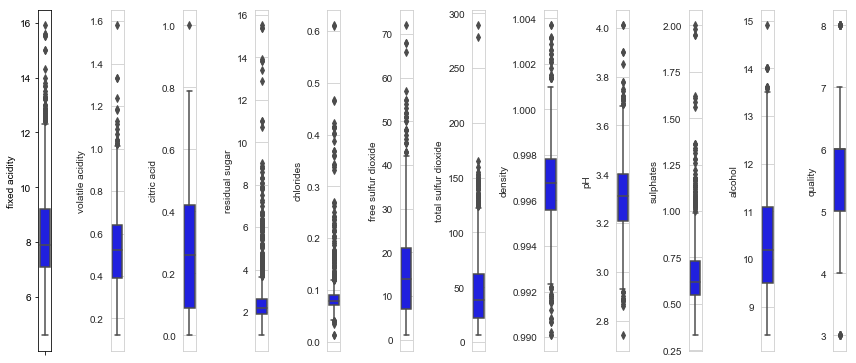

In [24]:
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(record[l[i]],color='blue',orient='v')
    plt.tight_layout()

All the features columns shows outliers.